# Implementation of LF-model

**Note:** functional code in `LF.py`

I used <https://pdfs.semanticscholar.org/1418/a18b9c353de44b0c087419d08abae4d0e733.pdf> for this. Also from that paper is this diagram:

![LF-model](LF-model.png)

**NOTE:** The LF-model has two implicit equations that need to be solved due to the continuity constraint for $U_g(t)$ and the constraint that the integral over $U_g'(t)$ must be zero. **It seems that the numerical routines are very sensitive to the five LF-model parameters listed below.** When debugging, set `visual=True` to help in the process.

## LF model parameters

The five time-domain parameters (denoted collectively by $P$) describing the GFM derivative are (`@Doval2006 p. 5`):

  1. $E_e$: maximum amplitude of the excitation (i.e. $U_g'(t)$)
  2. $T_0$
  3. $T_e$: instant of maximum excitation (GCI)
  4. $T_p$: instant of the maximum of $U_g(t)$
  5. $T_a$: time constant of the return phase (see picture above)
 
## Alternative parameters
 
Alternative definitions for the last three parameters are (Fant1995, The LF model revisited):

  - $R_k = (T_e-T_p)/T_p$
  - $R_g = T_0/(2T_p)$
  - $F_a=1/(2πT_a)$ (as an alternative to $R_a=T_a/T_0$)
  
This conversion is implemented in the `conv_R_param()` function in `LF.py`.
  
### Typical values

Typical values for male **vowels** are $F_a$ = 700 Hz, $R_k$ = 0.30, $R_g$ = 1.20.

Typical values for female **vowels** are $F_a$ = 400 Hz, $R_k$ = 0.30, $R_g$ = 1.00.

These are implemented in `gen_param()` in `LF.py`.

In [1]:
%cd ..
%pylab inline
import LF

/home/marnix/WRK/proj/ana/article/entropy/notebook
Populating the interactive namespace from numpy and matplotlib


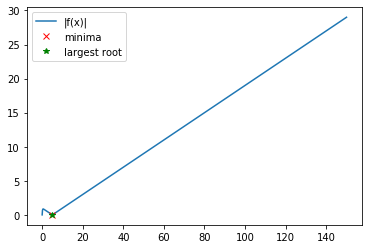

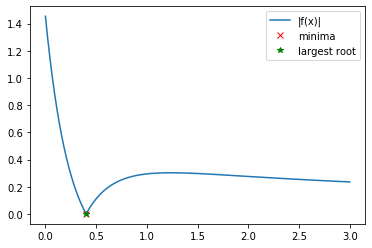

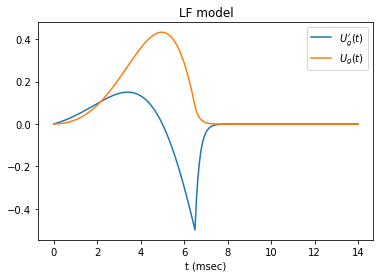

In [2]:
P = dict(Ee = .5,
          T0 = 14.,
          Te = 6.5,
          Tp = 5.,
          Ta = .2)

dt = 0.0625

t, u_prime = LF.Ug_prime(dt, **P, visual=True)
u = cumsum(u_prime)*dt

title("LF model")
plot(t, u_prime, label="$U_g'(t)$")
plot(t, u, label="$U_g(t)$")
xlabel("t (msec)")
legend()

In [3]:
%matplotlib qt
plot(u_prime)
plot(diff(u_prime))
plot(diff(diff(u_prime)))